In [ ]:
#import necessary packagaes
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

# Question 1: Exploratory Data Analysis


For this problem we will be using the `wine` dataset. The dataset is available directly from sklearn `(load wine())`. Here, just consider the 13 attributes (ignoring
the class). The idea is to predict the `Alcohol` value using other 12 attributes. So,
in essence you have 12 features and 1 target. For this dataset, do the following:

1. Visualize the dataset as a pandas dataframe with proper column names. Here:
> *   First 12 columns should represent the 12 features
> *   13th column should be the alochol value
2. Plot scatterplots of alcohol value vs each of the features. Since there are 12 features, plot the 12 scatterplots in a grid of 3 × 4.
3. Looking at the scatterplots above, which feature do you think will be most useful in predicting the alcohol value? Which feature will be least helpful? Explain.
4. In your opinion, what information, the following observations will give regarding the alcohol content (increase or decrease). You can use any method of your choice to make this decision. Make sure to explain
your reasoning.
> *   Increased value of Color intensity
> *   Reduced value of Proline
> *   Increased Magnesium but reduced Ash value








## 1.1

In [ ]:
#load in wine dataset
from sklearn.datasets import load_wine
wine = load_wine()

#Transform into dataframe
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
#move alcohol to end of dataframe, so first 12 columns are the predictive variables
alc_col = df.pop('alcohol')
df['alcohol'] = alc_col

#check results
df.head()

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcohol
0,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,14.23
1,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,13.20
2,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,13.16
3,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,14.37
4,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,13.24


## 1.2

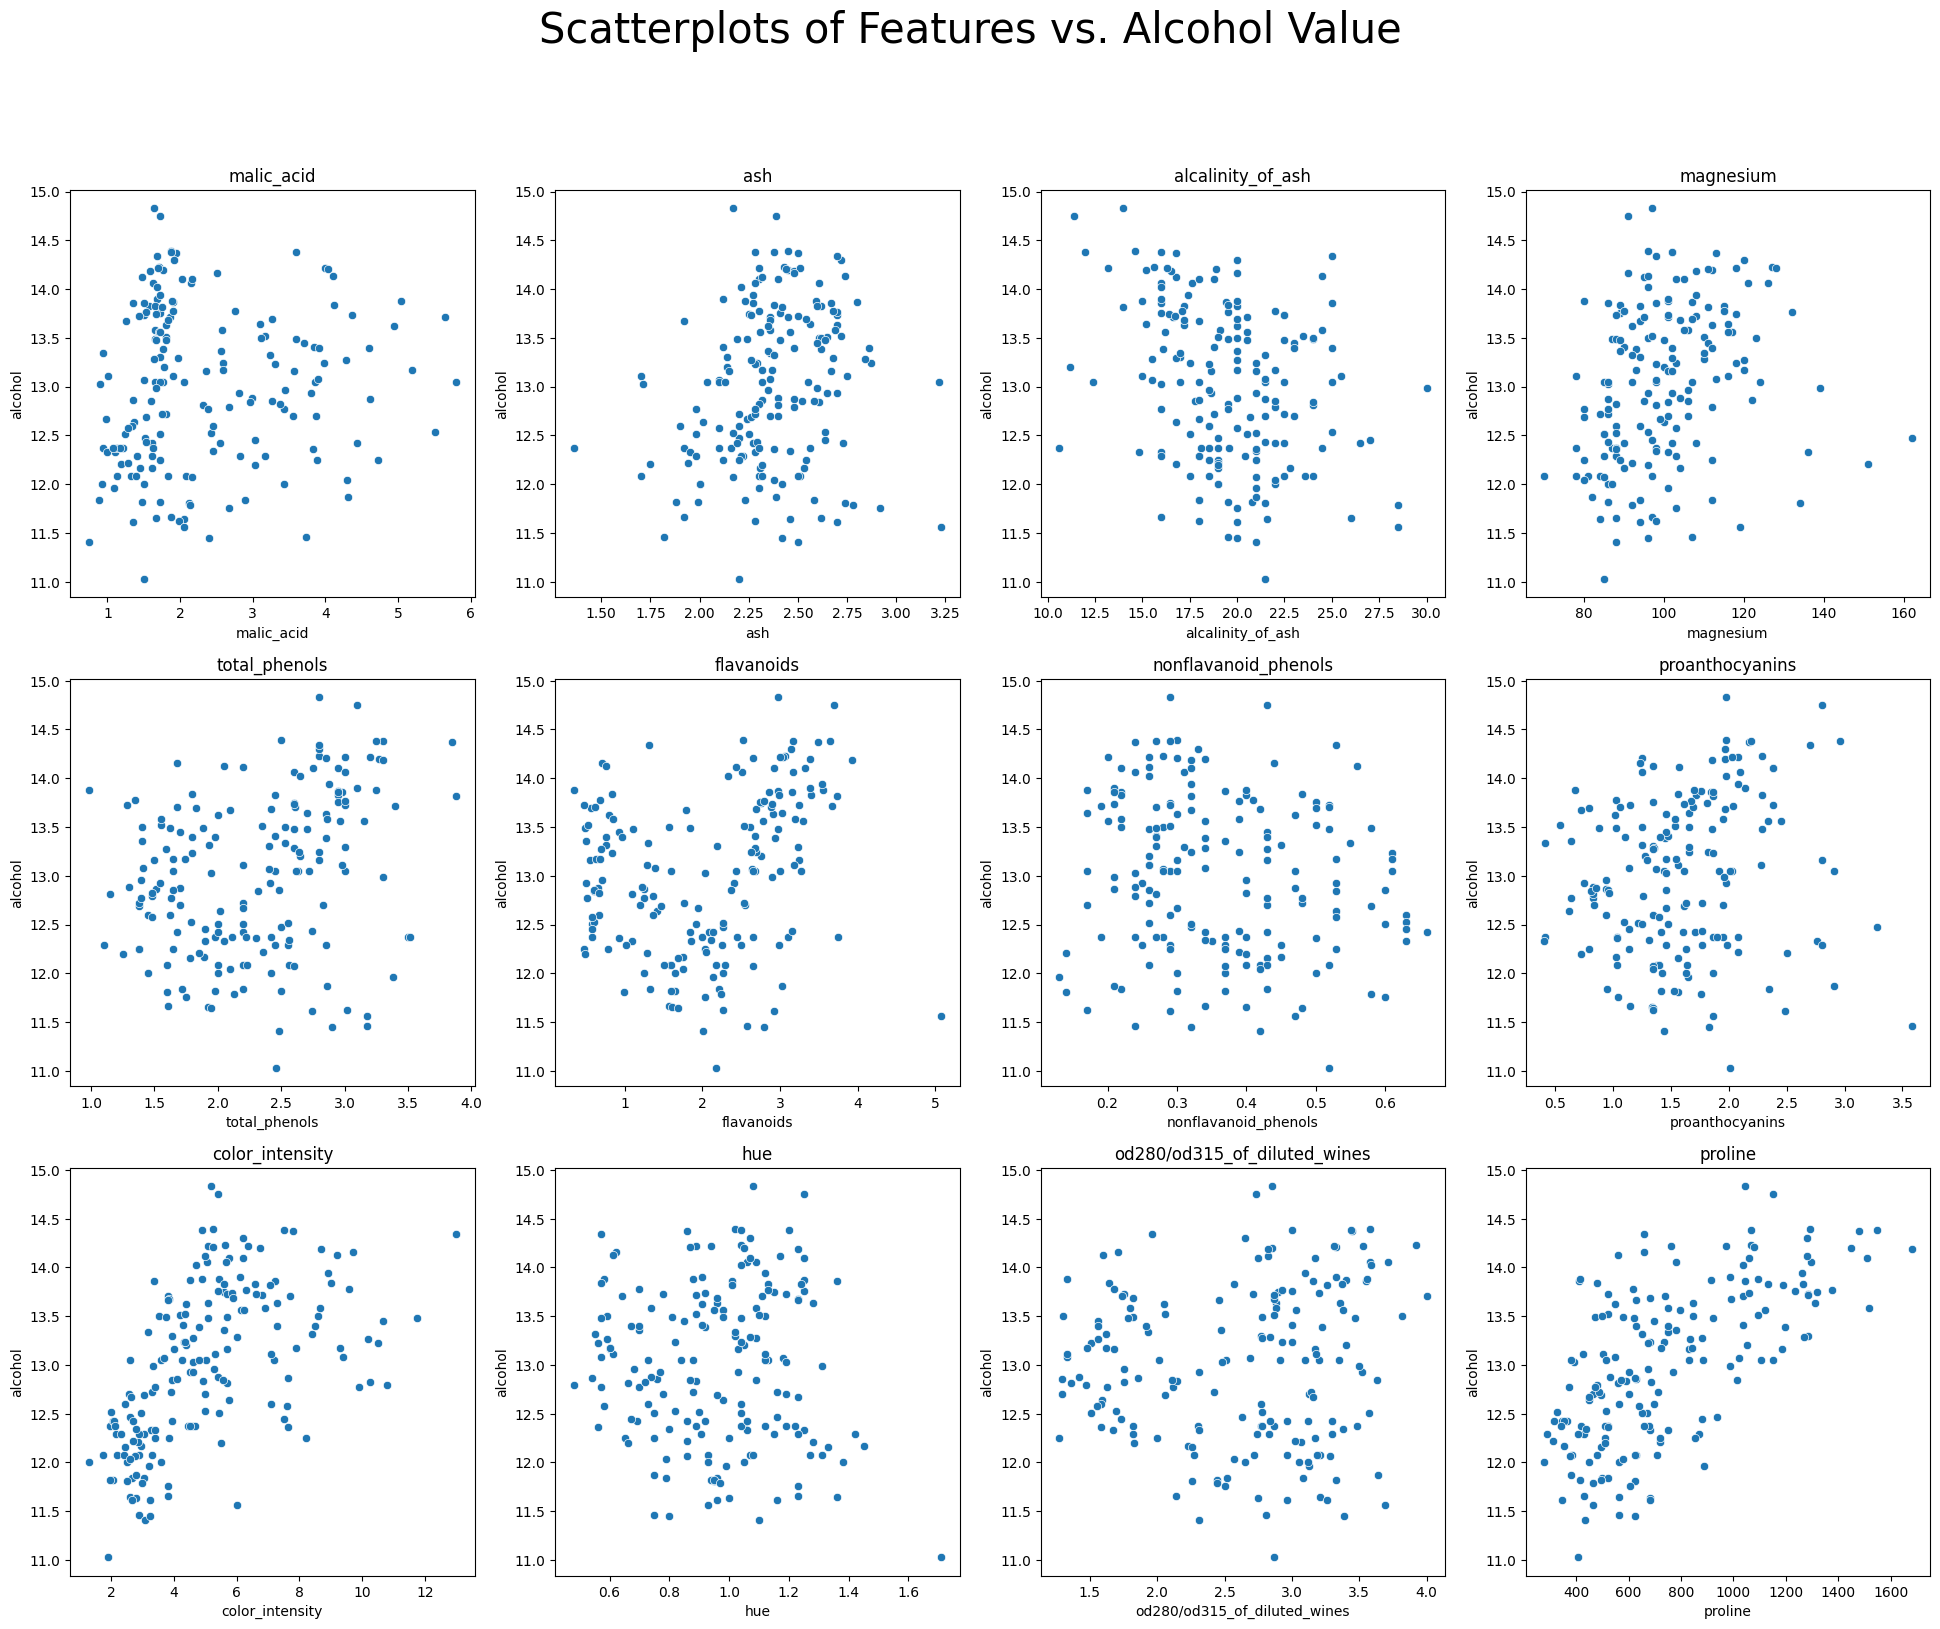

In [ ]:
#define rows and columns for grid of plots
rows = 3
cols = 4

#define target variable
target = df['alcohol']

#create figure/subplots
fig, axes = plt.subplots(rows, cols, figsize = (24, 18))
axes = axes.ravel()

#loop through all column variables, creating scatterplots
for i, column in enumerate(df.columns[:-1]):
  ax = axes[i]
  sns.scatterplot(x = column, y = target, data = df, ax = ax)

#create titles for each graph
for i, column in enumerate(df.columns[:-1]):
  axes[i].set_title(column)

#print plots
plt.suptitle('Scatterplots of Features vs. Alcohol Value', fontsize = 30)
plt.show()

## 1.3

Looking at the scatterplots, I want to try to identify the variables that have the most linear relationship with the alcohol value. At a glance, I notice that proline and color_intensity have relatively clear linear relationships with alcohol. flavanoids, magnesium, and total_phenols also appear to have somewhat of a linear relationship with the alcohol value, but it's not as clear. alcalinity_of_ash also appears to have a linear relationship, but it is negatively correlated with the alcohol content, and not as strong of a relationship as the proline and color_intensity appear to have.

I visually identify proline as the most useful in predicting alcohol value.

For the least helpful variable, I want to seek out the variables that appear to have very little correlation with the alcohol value. At first glance, the scatterplots that jump out to me is the od280/od315_of_diluted_wines and nonflavanoid_phenols. It is hard to tell by eye though as the human eye cannot interpret these things as well as an equation might. For this reason, I want to produce a correlation matrix of alcohol versus all of the attributes so that I can more accurately determine which variable is the least helpful.

In [ ]:
correlation = df.corr()['alcohol']
correlation

malic_acid                      0.094397
ash                             0.211545
alcalinity_of_ash              -0.310235
magnesium                       0.270798
total_phenols                   0.289101
flavanoids                      0.236815
nonflavanoid_phenols           -0.155929
proanthocyanins                 0.136698
color_intensity                 0.546364
hue                            -0.071747
od280/od315_of_diluted_wines    0.072343
proline                         0.643720
alcohol                         1.000000
Name: alcohol, dtype: float64

From the above correlation, I identify that hue, and od280/od315_of_diluted_wines have the least correlation with the alcohol value, meaning they are least helpful in determining that value.

This is interesting, because when I first looked at hue, I interpreted the scatterplot as having a somewhat linear relationship with alcohol value, but negatively correlated. The correlation matrix however shows me that my visual interpretation was not accurate to the data, showing the importance of producing the correlation matrix.

## 1.4

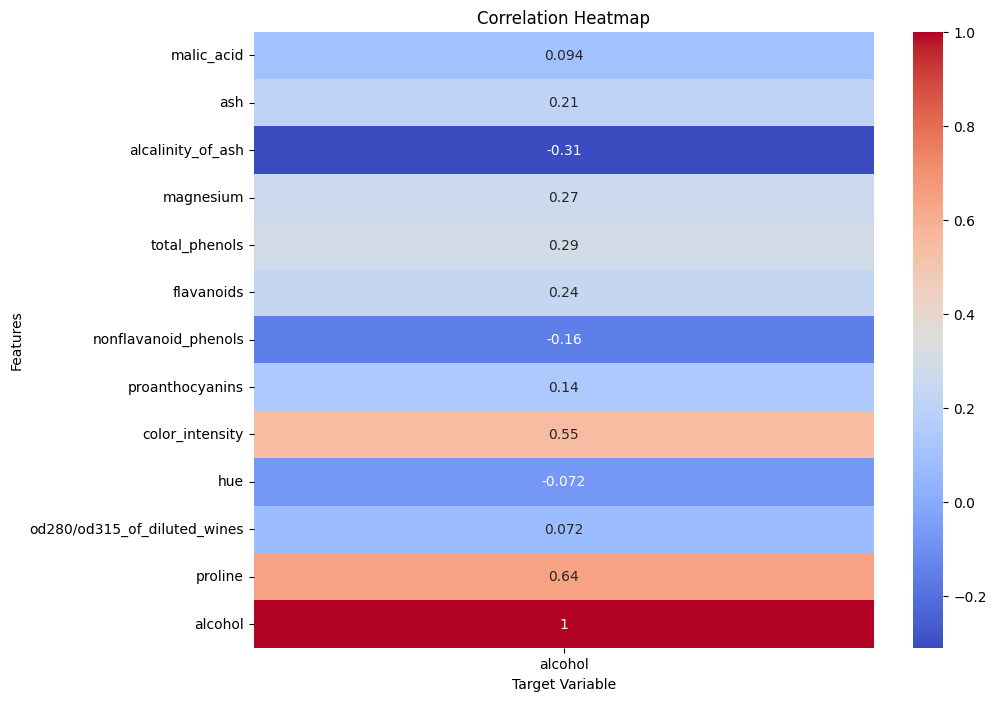

In [ ]:
#feature importance and correlation matrix
#heat map of correlation
corr_matrix = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix[['alcohol']], annot = True, cmap = 'coolwarm')

#add labels, show heatmap
plt.xlabel('Target Variable')
plt.ylabel('Features')
plt.title('Correlation Heatmap')
plt.show()

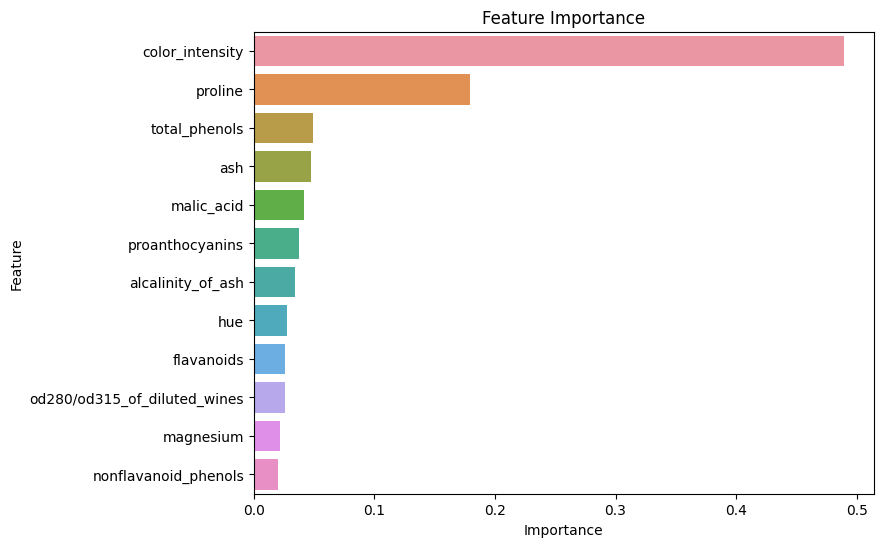

In [ ]:
#define features and target variables
x = df.drop(columns = ['alcohol'])
y = df['alcohol']

#fit a random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 25)
rf.fit(x,y)

#find feature importance scores
features = rf.feature_importances_

#visulize feature importance
features_df = pd.DataFrame({'Feature': x.columns, 'Importance':features})
features_df = features_df.sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8,6))
sns.barplot(x = 'Importance', y = 'Feature', data = features_df)
plt.title('Feature Importance')
plt.show()

Based on the above heatmap and feature importance model, I can identify the most likely affects different changes in the features may have on alcohol content.

**Increased value of Color intensity:**

color_intensity and alcohol have a high positive correlation as demonstrated in the heat map, and color_intensity is the most important feature to alcohol content as shown in the feature importance model. Increasing the color_intensity value will result in a higher alcohol value.

**Reduced value of Proline:**

proline and alcohol have the highest correlation according to the correlation matrix and heatmap, and proline is the second most important variable to the alcohol values. Reducing the proline value is more than likely going to decrease the alcohol value, due to their high positive correlation.

**Increased Magnesium but reduced Ash value:**

Interestingly here, the magnesium has a slightly higher correlation value to alcohol than ash does, but ash has a relatively higher feature importance compared to magnesium. Because of these differences, I am partial to believing that the alcohol value will decrease, since ash has a higher importance to the results of alcohol than magnesium does, and there is a positive correlation between ash and alcohol. This problem demonstrates the importance of utilizing multiple types of models when evaluating data like this, and making future predictions.


# Question 2: Regression

Now, just considering the feature ‘proline’ to predict the alcohol value

1. Fit a straight line: $alcohol = \beta_0 + \beta_1proline$. Plot this line over the scattered data. Compute the $R^2$ metric for this model. Please note that $R^2$ quantifies the quality of a regression model and is defined as
$R^2 = 1 - \frac{Residual\ sum\ of\ squares}{Total\ sum\ of\ squares} = 1 - \frac{\sum_{i=1}^n(y_i-\hat y_i)^2}{\sum_{i=1}^n(y_i-y)^2}$ \
Here, $y_i$ are the observed y values, $\hat y$ are the corresponding predicted y values, and $y$ is the average of all y values. Additionally, $n$ is the number of data points. Please note that $R^2$ values vary between $0$ and $1$ with $1$ representing a perfect fit to the data points.
2. Draw another plot, but this time with the above straight line model, also plot the graph of polynomials with degree $2,3,4$ and $5$ fitted over the same scattered data (alcohol vs proline). The graph legend should include the $R^2$ value of all 5 models.
3. Looking at the 5 models in previous part, which model do you think is the best. Explain. You can use any criteria of your choice to choose the best model.
4. Consider just the quadratic polynomial model $(alcohol = \beta_0 + \beta_1 proline + \beta_1 proline^2)$, plot the quadratic curve fitted to this data along with $95\%$ t-confidence interval and $95\%$ t-prediction interval. Use different colors and opaqueness to improve the visibility of the different intervals. Why do you think the confidence interval is contained in the prediction interval?
5. With the same $alcohol \ vs \ proline$ data, plot a figure with 6 subplots. Here subplot $1$ to $6$ should show polynomial model of degree $1$ to $6$ respectively with corresponding $95\%$ t-confidence intervals. Comment on the thickness of these intervals. For which model is the confidence interval most broad? What information does this plot provide you?


## 2.1

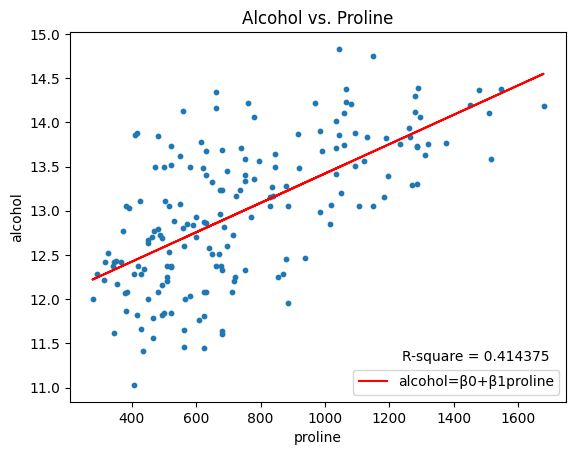

In [ ]:
#utilizing function developed in class
def poly_power(x,n):
  X = []
  for i in x:
    temp = []
    for j in range(n+1):
      temp.append(i**j)

    X.append(temp)
  return np.array(X)

#define proline variable
proline_x = df['proline']
Y = df['alcohol']

#apply poly_power function
X = poly_power(proline_x, n = 1)

#determine beta and prediction values
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
pred = X.dot(beta)

#find R^2 value
rss = np.sum((Y - pred) ** 2)
tss = np.sum((Y - np.mean(Y)) ** 2)
r2 = 1 - (rss/tss)

#plot results
plt.scatter(proline_x, Y, s = 10)
plt.plot(proline_x, pred, color = 'red', label  = 'alcohol=β0+β1proline')
plt.xlabel('proline')
plt.ylabel('alcohol')
plt.title('Alcohol vs. Proline')
plt.text(1240, 11.3, f'R-square = {r2:.6f}', fontsize = 10)

#show result
plt.legend(loc = 'lower right')
plt.show()

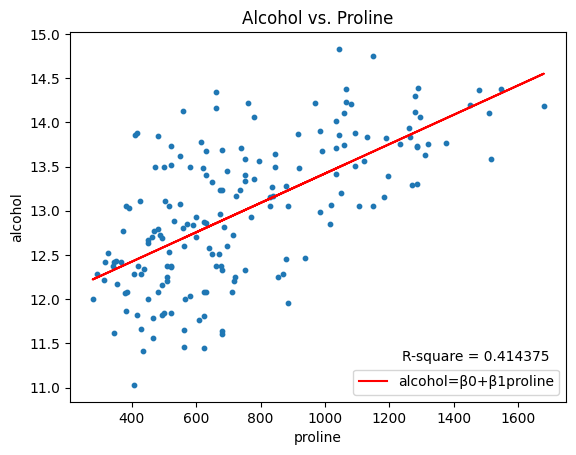

In [ ]:
#define x and y (alcohol and proline) for graphic purposes
alcohol = df['alcohol'].values.reshape(-1, 1)
proline = df['proline'].values.reshape(-1, 1)

#Define the linear regression model from sklearn and define the predicted alcohol values
model = LinearRegression()
model.fit(proline, alcohol)
alcohol_val = model.predict(proline)

#find the R_squared of the regression model
r2 = r2_score(alcohol, alcohol_val)

#create scatterplot and plot line
plt.scatter(proline, alcohol, s = 10)
plt.plot(proline, alcohol_val, color = 'red', label  = 'alcohol=β0+β1proline')
plt.xlabel('proline')
plt.ylabel('alcohol')
plt.title('Alcohol vs. Proline')

#print R_squared value
plt.text(1240, 11.3, f'R-square = {r2:.6f}', fontsize = 10)

#show result
plt.legend(loc = 'lower right')
plt.show()

## 2.2

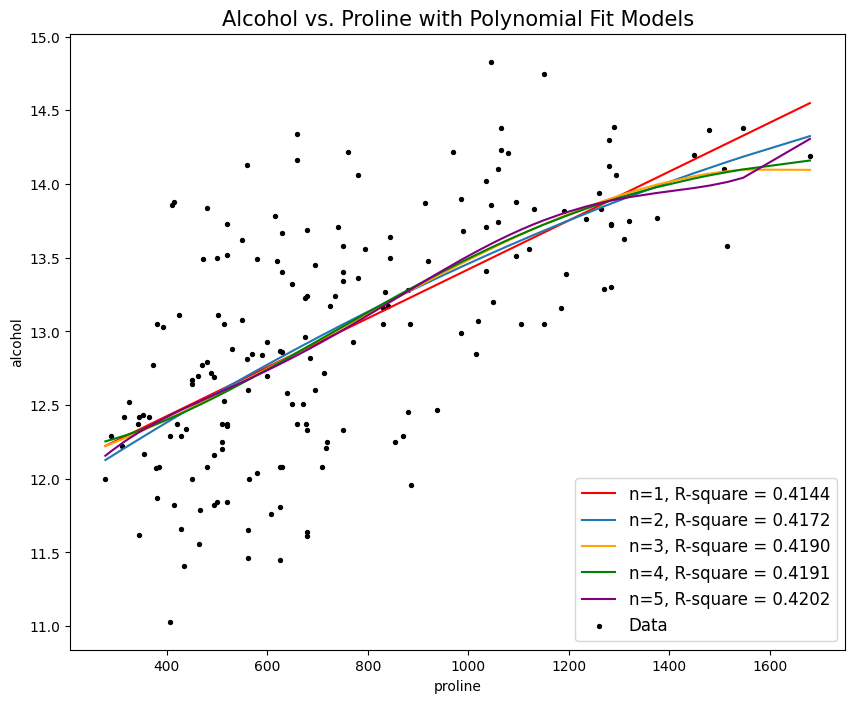

In [ ]:
#utilizing function developed in class
def poly_power(x,n):
  X = []
  for i in x:
    temp = []
    for j in range(n+1):
      temp.append(i**j)

    X.append(temp)
  return np.array(X)

proline_x = df['proline']
n_values = [1,2,3,4,5]

Y = df['alcohol']

plt.figure(figsize = (10,8))

for n in n_values:
  X_n = poly_power(proline_x, n)

  beta = np.linalg.inv(X_n.T.dot(X_n)).dot(X_n.T.dot(Y))

  pred = X_n.dot(beta)
  sorted_indices = np.argsort(proline_x)
  proline_x_sorted = proline_x.iloc[sorted_indices]
  pred_sorted = pred[sorted_indices]

  rss = np.sum((Y - pred) ** 2)
  tss = np.sum((Y - np.mean(Y)) ** 2)
  r2 = 1 - (rss/tss)

#I'm doing this so my colors match the model I created using sklearn so that I can more easily compare the two models
#not at all necessary if only running by itself, in that case I would simply remove the elif loop, and apply plt.plot to the for loop
  if n == 1:
    plt.plot(proline_x_sorted, pred_sorted, label=f'n={n}, R-square = {r2:.4f}', color = 'red')
  elif n == 5:
    plt.plot(proline_x_sorted, pred_sorted, label=f'n={n}, R-square = {r2:.4f}', color = 'purple')
  elif n == 3:
    plt.plot(proline_x_sorted, pred_sorted, label=f'n={n}, R-square = {r2:.4f}', color = 'orange')
  elif n == 4:
    plt.plot(proline_x_sorted, pred_sorted, label=f'n={n}, R-square = {r2:.4f}', color = 'green')
  else:
    plt.plot(proline_x_sorted, pred_sorted, label=f'n={n}, R-square = {r2:.4f}')


plt.scatter(proline_x, Y, label='Data', s = 8, color = 'black')
plt.xlabel('proline')
plt.ylabel('alcohol')
plt.title('Alcohol vs. Proline with Polynomial Fit Models', fontsize = 15)
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

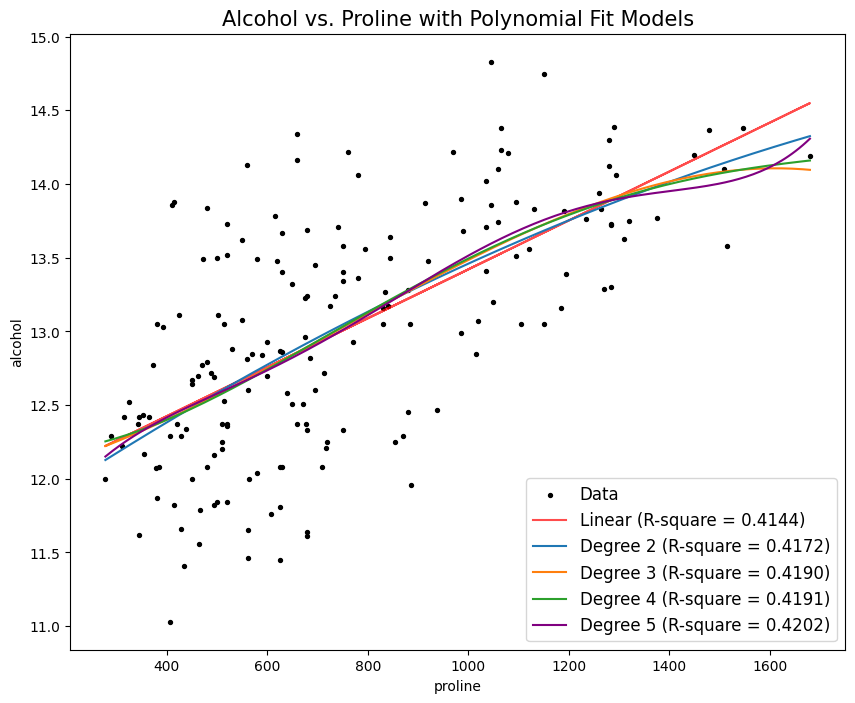

In [ ]:
#utilize previously defined variables
#define proline range to ensure polynomials graph properly, convert to 2D array
proline_range = np.linspace(min(proline), max(proline), 200).reshape(-1,1)

#define linear R_squared, as function may impact result with multiple runs
r2_linear = r2_score(alcohol, alcohol_val)

#define the 4 polynomials for models, create empty arrays for model and r_squared values, filled in by for loop
degrees = [2,3,4,5]
poly_models = []
r2_values = []

#run polynomials through linear regression model, finding r_squared values as well
for degree in degrees:
  poly_features = PolynomialFeatures(degree = degree)
  poly_proline = poly_features.fit_transform(proline.reshape(-1,1))
  model = LinearRegression()
  model.fit(poly_proline, alcohol)
  #create predictions for proline range
  poly_proline_range = poly_features.transform(proline_range)
  poly_alc_val = model.predict(poly_proline_range)
  poly_r2 = r2_score(alcohol, model.predict(poly_proline))
  poly_models.append((model, poly_features))
  r2_values.append(poly_r2)

#create scatterplot and single degree linear line
plt.figure(figsize = (10,8))
plt.scatter(proline, alcohol, s = 8, color = 'black', label = 'Data')
plt.plot(proline, alcohol_val, label = f'Linear (R-square = {r2_linear:.4f})', color = 'red', alpha = 0.7)

#plot polynomial models and r_squared values
for degree, (model, poly_features), r2 in zip(degrees, poly_models, r2_values):
  if degree == 5:
    plt.plot(proline_range, model.predict(poly_features.transform(proline_range)), label=f'Degree {degree} (R-square = {r2:.4f})', color = 'purple')
  else:
    plt.plot(proline_range, model.predict(poly_features.transform(proline_range)), label=f'Degree {degree} (R-square = {r2:.4f})')

#add final labels and print plot
plt.xlabel('proline')
plt.ylabel('alcohol')
plt.legend(loc = 'lower right', fontsize = 12)
plt.title('Alcohol vs. Proline with Polynomial Fit Models', fontsize = 15)
plt.show()

## 2.3

The easiest, most straightforward way to determine the best model here is to compare the $R^2$ values of the different models. Once again, like I discussed in problem 1, it is hard to tell with the human eye, which model has the overall best fit of the data, because the models are very similar at first glance.

In this case, the best fitting model would be the 5th degree polynomial fit. This is because it has the highest $R^2$ value at $R^2 = 0.4202$. The higher $R^2$ value represents smaller differences between the observed data, and the values fitted to the polynomial model. The $R^2$ values for these models are all very similar, which is why it is important to understand the purpose of the $R^2$ value when comparing the five models.

## 2.4

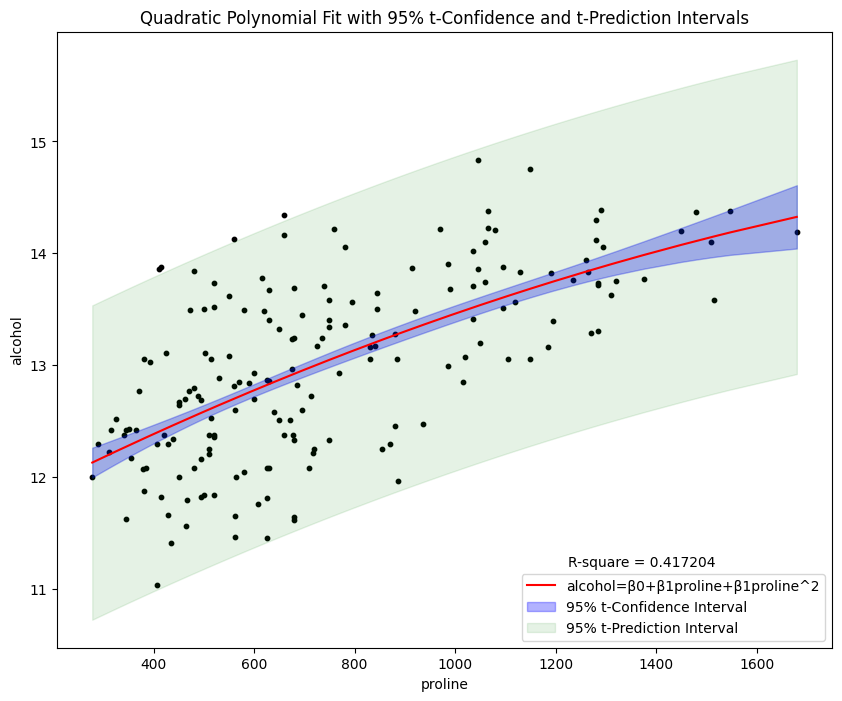

In [ ]:
#utilizing function developed in class
def poly_power(x,n):
  X = []
  for i in x:
    temp = []
    for j in range(n+1):
      temp.append(i**j)

    X.append(temp)
  return np.array(X)

#define proline variable
proline_x = df['proline']
Y = df['alcohol']

#apply poly_power function
X = poly_power(proline_x, n = 2)

#determine beta and prediction values
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
pred = X.dot(beta)

#sort values for plotting
sorted_indices = np.argsort(proline_x)
proline_x_sorted = proline_x.iloc[sorted_indices]
pred_sorted = pred[sorted_indices]

#find R^2 value
rss = np.sum((Y - pred) ** 2)
tss = np.sum((Y - np.mean(Y)) ** 2)
r2 = 1 - (rss/tss)

#find the t-confidence interval using standard error of residuals
Xp = poly_power(proline_x_sorted, n = 2)
e = Y - X.dot(beta)
var = np.linalg.norm(e)**2 / (len(Y)-2)
std = np.sqrt(var)

term1 = np.diag(Xp.dot(np.linalg.inv(X.T.dot(X))).dot(Xp.T))
term2 = np.sqrt(term1)
std_pred = std*term2

low_limit_conf = pred_sorted - std_pred
up_limit_conf = pred_sorted + std_pred

#find prediction error (t-prediction)
t_value = 2.262 #95% prediction
pred_err = t_value * np.sqrt(rss / (len(Y) - 2))

low_limit = pred_sorted - pred_err
up_limit = pred_sorted + pred_err

#plot results
plt.figure(figsize = (10,8))
plt.scatter(proline_x, Y, s = 10, color = 'black')
plt.plot(proline_x_sorted, pred_sorted, color = 'red', label  = 'alcohol=β0+β1proline+β1proline^2')
plt.fill_between(proline_x_sorted, low_limit_conf, up_limit_conf, alpha = 0.3, color = 'blue', label = '95% t-Confidence Interval')
plt.fill_between(proline_x_sorted, low_limit, up_limit, color = 'green', alpha = 0.1, label = '95% t-Prediction Interval')
plt.xlabel('proline')
plt.ylabel('alcohol')
plt.title('Quadratic Polynomial Fit with 95% t-Confidence and t-Prediction Intervals')
plt.text(1225, 11.2, f'R-square = {r2:.6f}', fontsize = 10)

#show result
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
std

0.6232884455591964

The confidence interval is within the bounds of the prediction interval because the two intervals are evaluating different values, and the inherit qualities of these types of intervals produce wider or thinner areas. A 95% confidence interval is evaluating where the mean value of the data lies, with 95% confidence. The prediction interval however, is evaluating where any future point of data may lie, with 95% confidence. One is making an evalutation of current data, while the other is evaluating future data. Known data will produce a thinner margin, because we have more accuracy in our uncertainties, while potential future data will encompass a larger area, since it is a prediction.

## 2.5

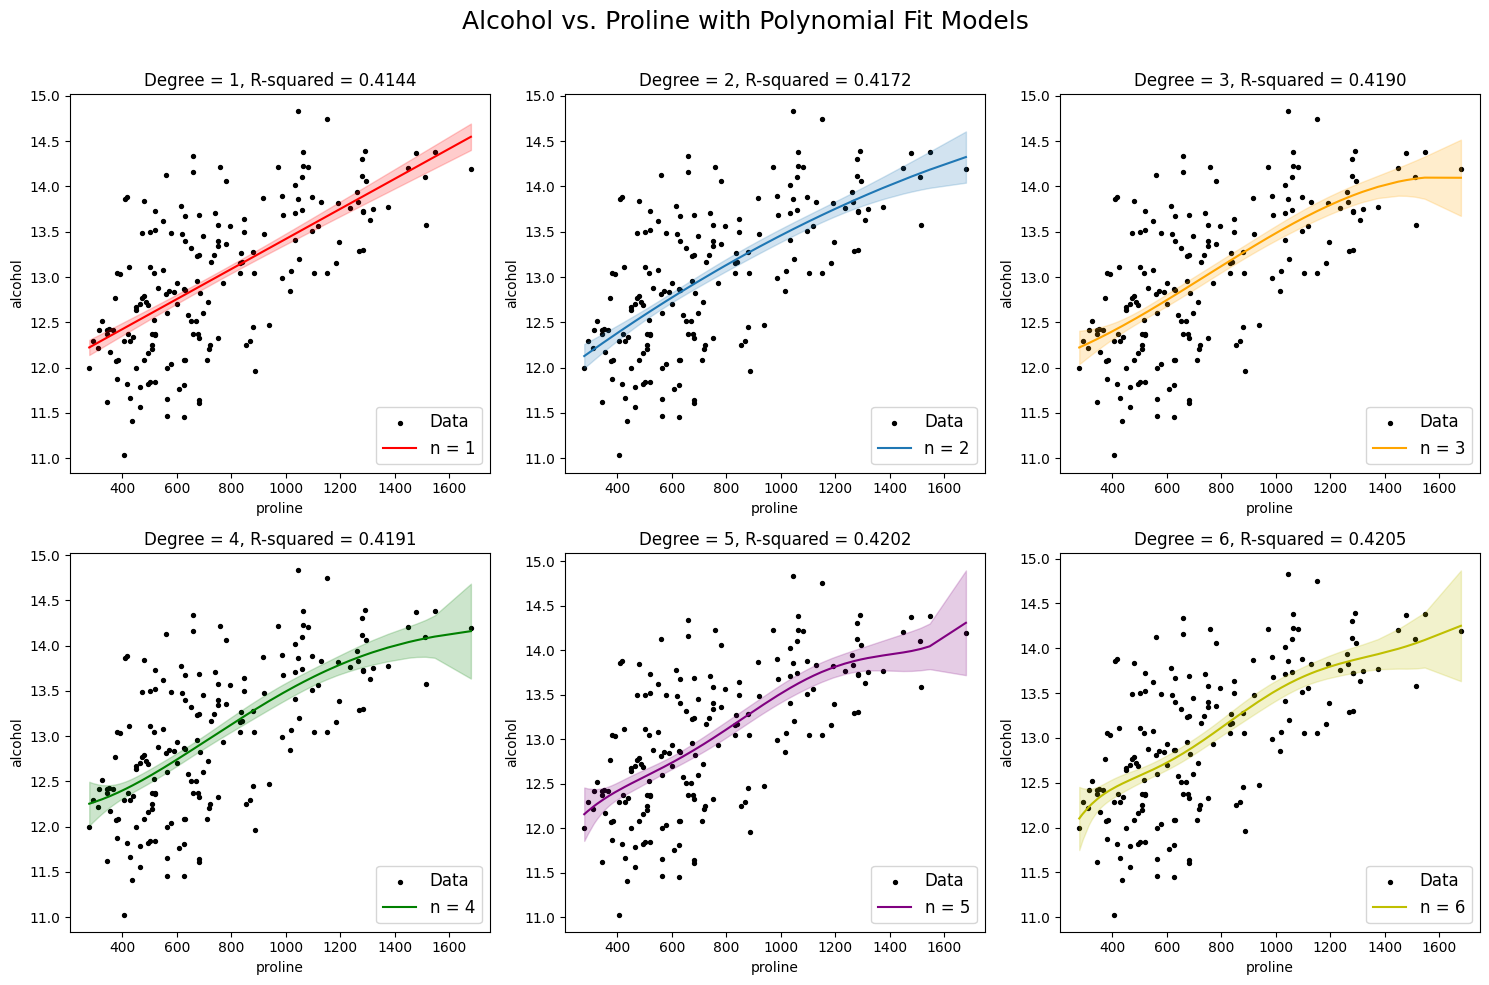

In [ ]:
#utilizing function developed in class
def poly_power(x,n):
  X = []
  for i in x:
    temp = []
    for j in range(n+1):
      temp.append(i**j)

    X.append(temp)
  return np.array(X)

proline_x = df['proline']
n_values = [1,2,3,4,5,6]

Y = df['alcohol']

fig, axs = plt.subplots(2,3,figsize = (15,10))
fig.suptitle('Alcohol vs. Proline with Polynomial Fit Models\n', fontsize=18)

#define list of colors used
colors = ['red', 'tab:blue', 'orange', 'green', 'purple', 'y']

for n, ax, color in zip(n_values, axs.ravel(), colors):
  X_n = poly_power(proline_x, n)

  beta = np.linalg.inv(X_n.T.dot(X_n)).dot(X_n.T.dot(Y))

  pred = X_n.dot(beta)
  sorted_indices = np.argsort(proline_x)
  proline_x_sorted = proline_x.iloc[sorted_indices]
  pred_sorted = pred[sorted_indices]

  rss = np.sum((Y - pred) ** 2)
  tss = np.sum((Y - np.mean(Y)) ** 2)
  r2 = 1 - (rss/tss)

  Xp = poly_power(proline_x_sorted, n)
  e = Y - X_n.dot(beta)
  var = np.linalg.norm(e)**2 / (len(Y) - n)
  std = np.sqrt(var)

  term1 = np.diag(Xp.dot(np.linalg.inv(X_n.T.dot(X_n)).dot(Xp.T)))
  term2 = np.sqrt(term1)
  std_pred = std*term2

  low_limit_conf = pred_sorted - std_pred
  up_limit_conf = pred_sorted + std_pred

  ax.scatter(proline_x, Y, label='Data', s = 8, color = 'black')
  ax.plot(proline_x_sorted, pred_sorted, label = f'n = {n}', color = color)
  ax.fill_between(proline_x_sorted, low_limit_conf, up_limit_conf, alpha=0.2, color=color)
  ax.set_xlabel('proline')
  ax.set_ylabel('alcohol')
  ax.set_title(f'Degree = {n}, R-squared = {r2:.4f}')
  ax.legend(loc = 'lower right', fontsize = 12)

plt.tight_layout()
plt.show()

Although it is difficult to distinguish at a glance, I observe that the confidence interval seems to widen as the polynomial function degrees increases. As the models I create become more complex with increasing polynomials, the predictions become less precise, leading to the expanding/ widening confidence interval, especially towards the right side of the plots. As there are less points to evaluate, the uncertainty increases, and as the model becomes more complex, the uncertainty in predicted values increases. This is also demonstrated by the thinner confidence interval for the linear function shown in red. This is a less complicated model, so future values are easier to identify.

In [ ]:
std

0.626938797049768